# Henry Jacob

### Task #5: Exploratory Data Analysis - Sports

![](https://indianstunners.com/wp-content/uploads/2019/03/1522046893_LAHyVx_iplbig.jpg)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read mathes data
df_matches = pd.read_csv('matches.csv')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# read delivery data
df_delivery = pd.read_csv('deliveries.csv')
df_delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
# to see column names in matches  
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
# to see column names in delivery
df_delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
# to consume memory we take only below three column from matches dataframe
season = df_matches[['id','season','winner']]

In [7]:
season.head(3)

,id,season,winner
0,1,2017,Sunrisers Hyderabad
1,2,2017,Rising Pune Supergiant
2,3,2017,Kolkata Knight Riders


In [8]:
# merge taken columns to delivery dataframe and create a new one 'df_new'
df_new = df_delivery.merge(season, left_on = 'match_id', right_on = 'id')

In [36]:
wins_per_season = df_matches.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

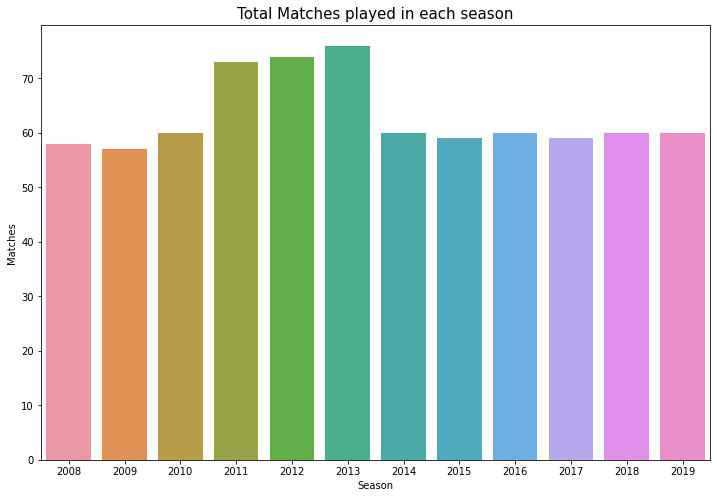

In [10]:
#to see total matches played in each season
plt.figure(figsize = (12,8))
sns.countplot(x = 'season', data = df_matches)
plt.title("Total Matches played in each season", fontsize=15)
plt.xlabel("Season", fontsize = 10)
plt.ylabel('Matches', fontsize = 10)
plt.show()

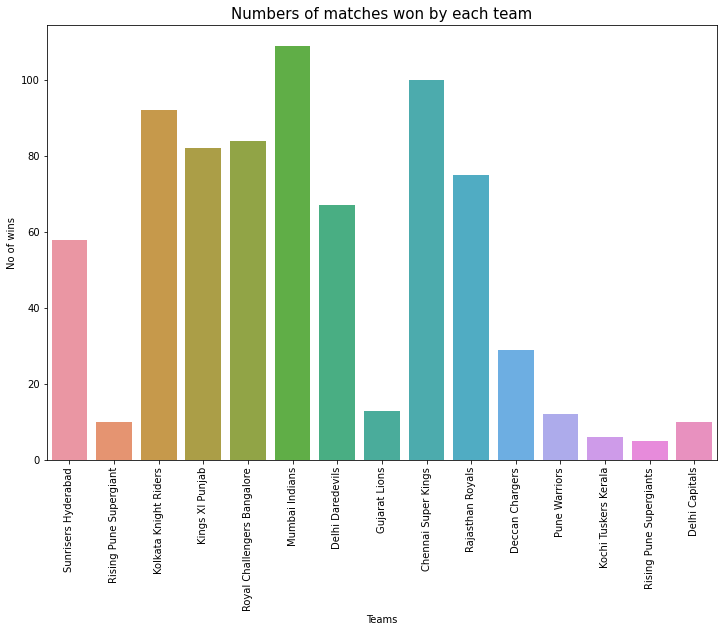

In [11]:
# to see number of mathes won by each team
plt.figure(figsize = (12,8))
sns.countplot(x='winner', data = df_matches)
plt.title("Numbers of matches won by each team", fontsize=15)
plt.xticks(rotation = 90)
plt.xlabel("Teams",fontsize = 10)
plt.ylabel("No of wins", fontsize = 10)
plt.show()

If a team has won_by_runs more than 0 the team must be bat first

In [12]:
# create new column 'win_by' based on win_by runs
df_matches['win_by'] = np.where(df_matches['win_by_runs']>0, 'Bat first', 'Bowl first')

In [13]:
win = df_matches.win_by.value_counts()

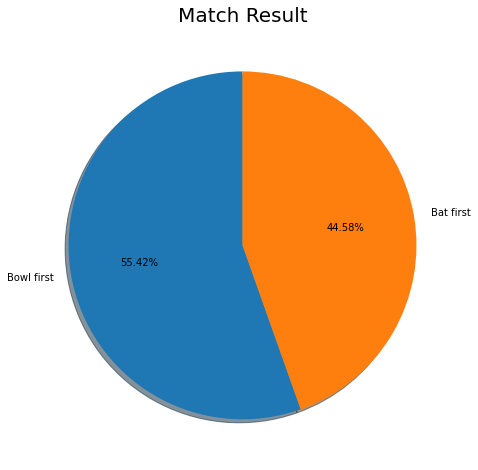

In [14]:
# to see win_by 
win = df_matches.win_by.value_counts()
plt.figure(figsize = (12,8))
plt.pie(win.values, labels=win.index, autopct='%.2f%%', shadow=True, startangle=90)
plt.title('Match Result', fontsize=20)
plt.show()

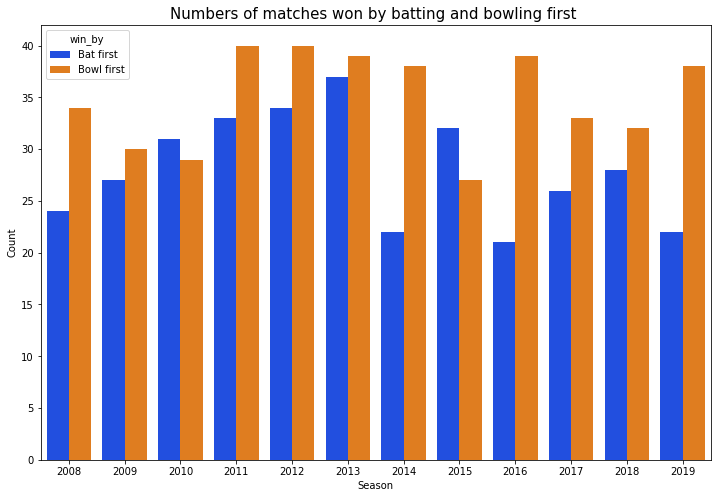

In [15]:
# to see win_by based on each year
plt.figure(figsize = (12,8))
sns.countplot(x = 'season', hue = 'win_by', data = df_matches,palette = 'bright')
plt.title("Numbers of matches won by batting and bowling first ", fontsize = 15)
plt.xlabel("Season", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

In [16]:
toss = df_matches.toss_decision.value_counts()

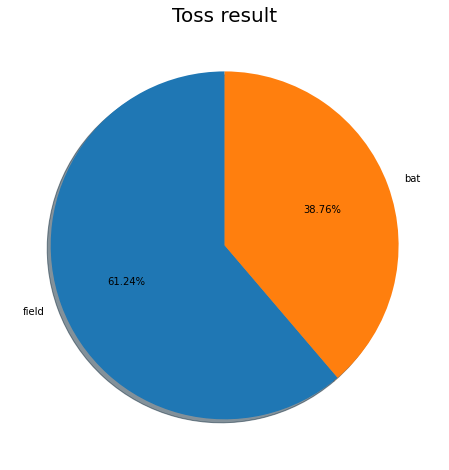

In [17]:
# to see toss win team choose to play
plt.figure(figsize = (10,8))
plt.pie(toss.values, labels=toss.index, autopct='%.2f%%', shadow=True, startangle=90)
plt.title('Toss result',fontsize = 20)
plt.show()

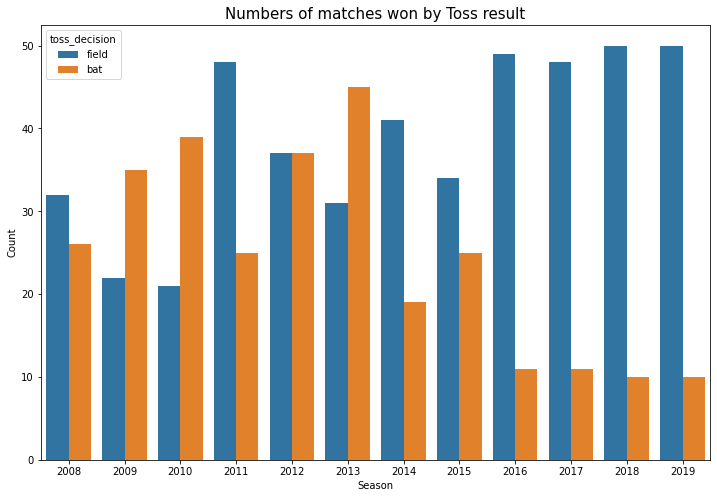

In [18]:
# to see number of mathes won by toss result
plt.figure(figsize = (12,8))
sns.countplot(x = 'season', hue = 'toss_decision', data = df_matches)
plt.title("Numbers of matches won by Toss result", fontsize=15)
plt.xlabel("Season", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

In [19]:
# to see season winner
final_matches = df_matches.drop_duplicates(subset = ['season'], keep='last')
final_matches[['season','winner']].reset_index(drop = True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


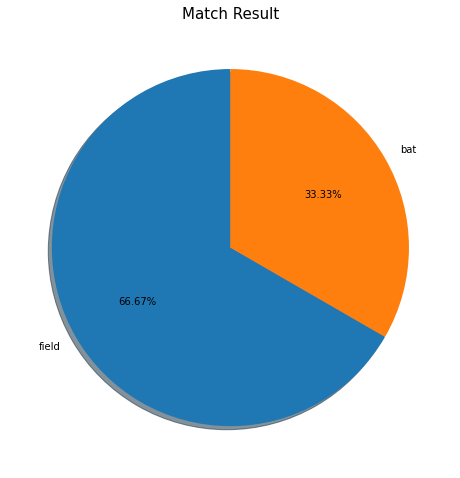

In [20]:
# to see final match toss choose
final_match = final_matches.win_by.value_counts()
plt.figure(figsize = (8,10))
plt.pie(final_match.values,  labels=toss.index,autopct='%.2f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=15)
plt.show()

In [21]:
# to see top players
top_players = df_matches.player_of_match.value_counts()[:10]
top_players.keys

<bound method Series.keys of CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64>

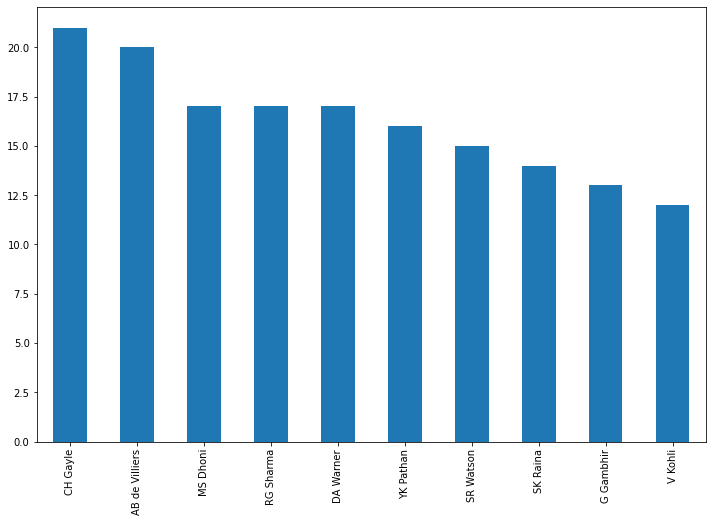

In [22]:
plt.figure(figsize = (12,8))
top_players.plot(kind = 'bar')
plt.show()

In [23]:
# to see more times winner
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

In [24]:
# to see each season winner and player_of_match
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [25]:
# to see toss winner, toss decision and winner in final
final_matches[['toss_winner', 'toss_decision', 'winner']].reset_index(drop = True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [26]:
# to see fours and sixes in each team
df_four=df_new[df_new['batsman_runs']==4]
fours = df_four.groupby('batting_team')['batsman_runs'].agg([('fours','count')]).reset_index()
df_six=df_new[df_new['batsman_runs']==6]
sixes = df_six.groupby('batting_team')['batsman_runs'].agg([('six','count')])
fours_and_sixes = fours.merge(sixes, left_on='batting_team', right_on='batting_team')
fours_and_sixes

,batting_team,fours,six
0,Chennai Super Kings,2193,973
1,Deccan Chargers,957,400
2,Delhi Capitals,242,87
3,Delhi Daredevils,2158,801
4,Gujarat Lions,460,155
5,Kings XI Punjab,2458,976
6,Kochi Tuskers Kerala,170,53
7,Kolkata Knight Riders,2434,930
8,Mumbai Indians,2588,1096
9,Pune Warriors,525,196


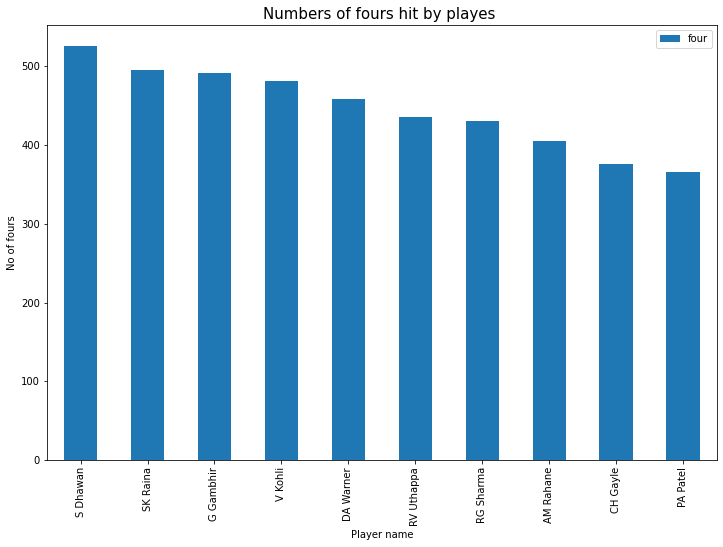

In [27]:
# to see number of fours by player
plt.rcParams['figure.figsize'] = (12, 8)
batsman_four=df_four.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
batsman_four.iloc[:10,:].plot('batsman','four',kind='bar')
plt.title("Numbers of fours hit by playes ",fontsize=15)
plt.xticks(rotation=90)
plt.xlabel("Player name",fontsize=10)
plt.ylabel("No of fours",fontsize=10)
plt.show()

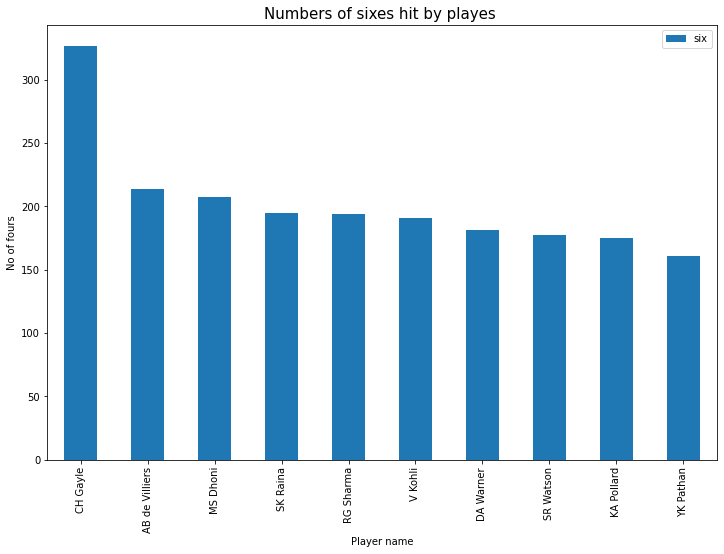

In [28]:
# to see number of six by player
plt.rcParams['figure.figsize'] = (12, 8)
batsman_six=df_six.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
batsman_six.iloc[:10,:].plot('batsman','six',kind='bar')
plt.title("Numbers of sixes hit by playes ",fontsize=15)
plt.xticks(rotation=90)
plt.xlabel("Player name",fontsize=10)
plt.ylabel("No of fours",fontsize=10)
plt.show()

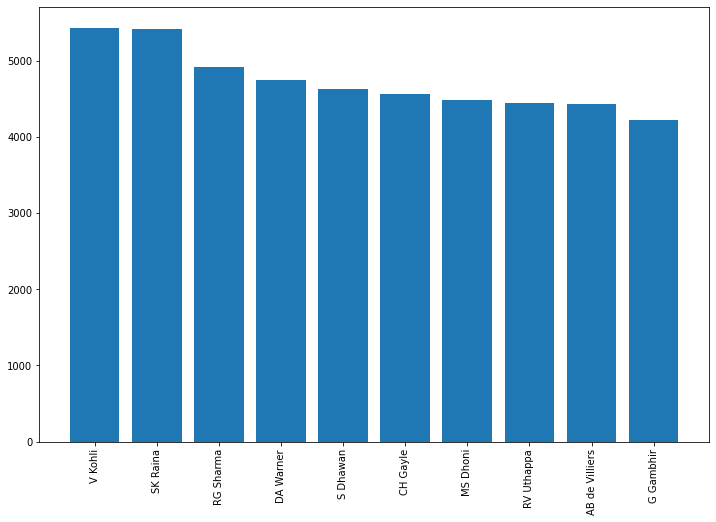

In [29]:
# to see top scored batsman
batsman_score=df_delivery.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'runs'}).iloc[:10,:]
plt.bar(x = batsman_score['batsman'], height = batsman_score['runs'])
plt.xticks(rotation=90)
plt.show()

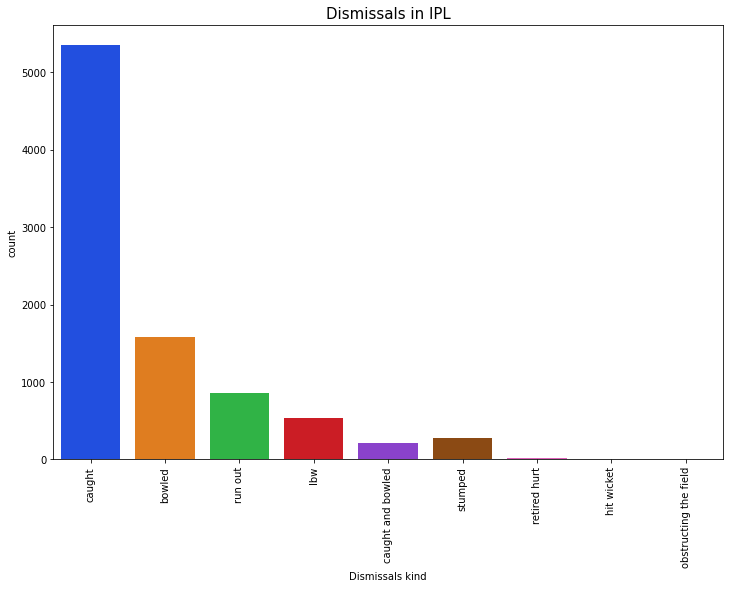

In [30]:
# to see player dismissal
plt.figure(figsize=(12,8))
sns.countplot(x = df_delivery.dismissal_kind, palette='bright')
plt.title("Dismissals in IPL",fontsize=15)
plt.xlabel("Dismissals kind",fontsize=10)
plt.ylabel("count",fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [31]:
wicket_data=df_delivery.dropna(subset=['dismissal_kind'])
wicket_data['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [32]:
# to see top bowlers
top_bowlers = wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]
top_bowlers.rename(columns = {'count':'wickets'})

,bowler,wickets
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127
